# Lecture 14: Probability

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Monty Hall

In [2]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3], dtype=int64)

In [3]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [9]:
np.random.choice(prizes, 3, replace=False)

array(['first goat', 'car', 'second goat'], dtype='<U11')

In [10]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door | Prize
1    | car
2    | first goat
3    | second goat

In [11]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the car
Behind door number 2 is the first goat
Behind door number 3 is the second goat


In [12]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 1
The first goat is behind door number 2
The second goat is behind door number 3


In [13]:
a_guess = np.random.choice(doors)
a_guess

3

In [14]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 3 which hides the second goat
Monty Hall opens door 2 to expose the first goat


In [15]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 1 hides the car


In [16]:
# A different way to create a table: provide the labels as a list
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(1, 10000+1):
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    # Append one row to the table
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

trial | guess       | exposed     | remaining
1     | first goat  | second goat | car
2     | first goat  | second goat | car
3     | second goat | first goat  | car
4     | car         | second goat | first goat
5     | second goat | first goat  | car
6     | first goat  | second goat | car
7     | car         | second goat | first goat
8     | second goat | first goat  | car
9     | first goat  | second goat | car
10    | car         | first goat  | second goat
... (9990 rows omitted)

In [17]:
trials.group('guess')

guess       | count
car         | 3341
first goat  | 3302
second goat | 3357

In [18]:
trials.group('exposed')

exposed     | count
first goat  | 5025
second goat | 4975

In [19]:
trials.group('remaining')

remaining   | count
car         | 6659
first goat  | 1673
second goat | 1668

In [20]:
compare = trials.group('guess')\
                .relabeled('count', 'Guess Count')\
                .join('guess', trials.group('remaining'), 'remaining')\
                .relabeled('count', 'Remaining Count')\
                .relabeled('guess', 'Prize')
compare

Prize       | Guess Count | Remaining Count
car         | 3341        | 6659
first goat  | 3302        | 1673
second goat | 3357        | 1668

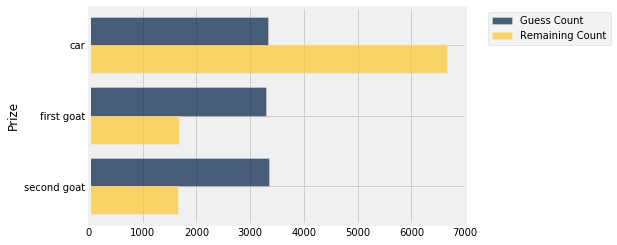

In [21]:
compare.barh('Prize')

## Probability

A. 1/6  
B. 1/3  
C. 1/2  
D. something else

#### Cards

Red Green Blue

What's the chance of GR (first G, second R) when sampling two cards without replacement?

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

Outcomes are: RB RG BR BG GR GB

P(GR) = 1/6

#### Counting outcomes

What's the chance of drawing the red card (either first or second) when sampling two cards without replacement?

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

Outcomes are: RB RG BR BG GR GB

P(drew the red card) = 4/6

#### Multiplication rule

P(GR) = P(drew G first) $\times$ P(drew R second given that drew G first) = 1/3 $\times$ 1/2

#### Addition rule

What's the chance of one R and one G in any order when sampling two cards without replacement?

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

P(one R and one G in any order) = P(GR) + P(RG) = 1/6 + 1/6

#### Example: Flipping coin ten times

P(at least one H) = 1 - P(not one H) = 1 - P(TTTTTTTTTT) = 1 - (1/2)**10

In [ ]:
1 - (1/2)**10